In [27]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

In [28]:
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]

In [29]:
# define Dataset
class Dataset:
    def __init__(self, dataset, vector_machine):
      self.x, self.y = dataset
      self.y = np.array([vector_machine[_] for _ in self.y])
    def __getitem__(self, item): return self.x[item], self.y[item]
    def __len__(self): return len(self.y)
# Dataset

def dataset_visualize(dataset: Dataset):
    for x, y in dataset: print(f"{'-' * 16}\nx: {x}\ny: {y}")
# dataset_visualize

# init Datasets
hv_machine = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
trainset = Dataset((data.data, data.target), vector_machine=hv_machine)
testset = Dataset((data.data, data.target), vector_machine=hv_machine)
### dataset_visualize(trainset)

In [30]:
def sigmoid(x): return 1 / (1 + np.exp(-1 * x))
def relu(x): return np.maximum(0, x)
def one_hot(x):
  for array in x:
    target_indice = np.argmax(array)
    for i, _ in enumerate(array):
      if i == target_indice: continue
      array[i] = 0
# one_hot

In [63]:
def OHV(prob):
    max_indices = np.argmax(prob, axis=1)
    one_hot = np.zeros(prob.shape)
    one_hot[np.arange(prob.shape[0]), max_indices] = 1
    return one_hot
# OHV

class ADALINE:
    def __init__(self, n_inpt, n_class, act_func):
      self.n_class = n_class
      self.weight = np.zeros(shape=(n_inpt, n_class))
      self.act_func = act_func
    # __init__

    def gdr(self, x, y, lr):
      indications = self.__call__(x)
      self.weight -= (lr / x.shape[0]) * np.dot(x.T, (indications - y))
    # gdr

    def train(self, dataset, iters: int, lr):
        for _ in range(iters):
          self.gdr(dataset.x, dataset.y, lr)
    # train

    def __call__(self, x): return self.act_func(np.dot(x, self.weight))

    def loss(self, dataset):
        x, y = dataset.x, dataset.y
        probability = OHV(self.__call__(x))
        loss = np.mean((y - probability) ** 2)
        print(f"loss: {loss:.3f}")
    # loss
# ADALINE

In [64]:
model = ADALINE(len(trainset.x[0]), len(trainset.y[0]), sigmoid)
model.loss(trainset)
model.train(trainset, iters=100, lr=1)
model.loss(trainset)

loss: 0.444
loss: 0.022


In [65]:
discrimination = lambda arr, value=1: np.where(arr == value)[0]
labels = ["setosa","versicolour","virginica"]

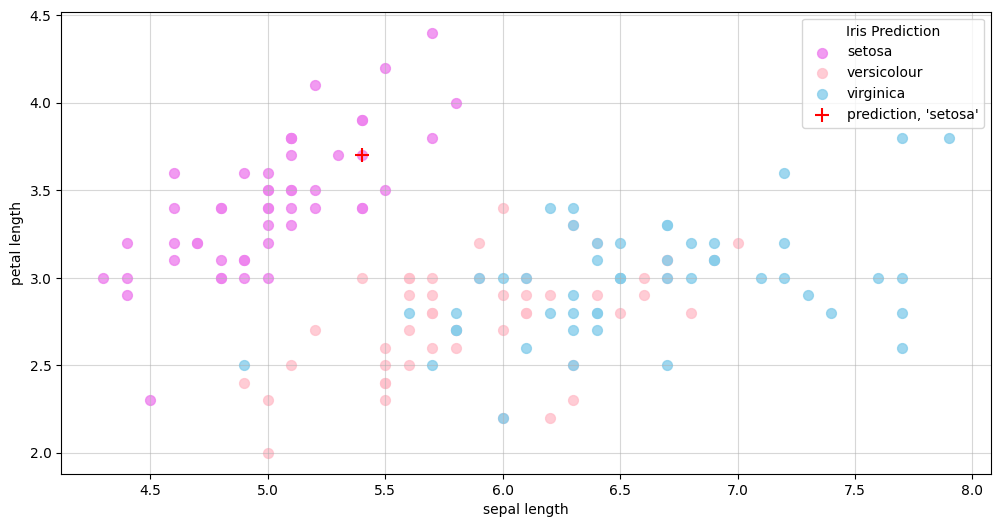

In [66]:
# init a testset
index = random.randrange(0, 50)
test_x, test_y = testset[index]

setosa = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if discrimination(trainset.y[_], 1) == 0])
versicolour = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if discrimination(trainset.y[_], 1) == 1])
virginica = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if discrimination(trainset.y[_], 1) == 2])
pred = model(test_x)

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.set_xlabel('sepal length')
ax1.set_ylabel('petal length')
ax1.grid(True, alpha=0.5)

ax1.scatter(x=setosa[:, 0], y=setosa[:, 1], s=50, alpha=0.8, c="violet", label="setosa")
ax1.scatter(x=versicolour[:, 0], y=versicolour[:, 1], s=50, alpha=0.8, c="pink", label="versicolour")
ax1.scatter(x=virginica[:, 0], y=virginica[:, 1], s=50, alpha=0.8, c="skyblue", label="virginica")
ax1.scatter(x=test_x[0], y=test_x[1], s=100, alpha=1, c="r", marker="+", label=f"prediction, '{labels[np.argmax(pred)]}'")
ax1.legend(fontsize="10", loc="best", title="Iris Prediction")

In [67]:
print(f"predicted class: {np.argmax(pred)} actual class: {np.argmax(test_y)}")

predicted class: 0 actual class: 0
